In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sin, cos, tan

In [2]:
F = 10
def s(alph):
    return 2*F/(tan(alph))

In [3]:
x = np.linspace(0.1, math.pi*0.45, 200)
y = [s(a) for a in x]

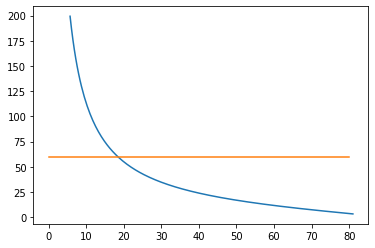

In [4]:
plt.plot(x*180/math.pi,y)
plt.plot([0,80], [60,60])

In [5]:
#for ang, s in zip(x,y):
#    print(round(ang, 1)*180/math.pi, round(s,1))

In [6]:
# Oppgave 3d) dampening
w1 = 800*2*math.pi/60
w2 = 8000*2*math.pi/60
a1 = (2*w1*w2)*(0.05*w2 - 0.1*w1)/(w2**2-w1**2)
print("a1", a1)

a2 = 2*(0.1*w2-0.05*w1)/(w2**2-w1**2)
print("a2", a2)


a1 6.769761947129522
a2 0.00022908666051106157


In [7]:
# Deformation element fra eksamen 2020
x1 = np.array([1, 0.5])
x2 = np.array([2.0, 1.0])
v = [.2, .3, .5, -.1, 1, .6]

v_glob1 = np.array([0.25, 0.3])
v_glob2 = np.array([-0.1, 1])
v_glob = np.concatenate((v_glob1, v_glob2))
L0_vec = x2 - x1
L0 = np.linalg.norm(L0_vec)
Ld_vec = (x2 + v_glob2) - (x1+v_glob1)
Ld = np.linalg.norm(Ld_vec)

deformation = Ld - L0
v_loc = np.array([-deformation/2, 0, deformation/2, 0])
print("Deformation in local system\n", v_loc)

Deformation in local system
 [-0.12335021  0.          0.12335021  0.        ]


In [10]:
# Oppgave 5
x1 = np.array([1, 0.5])
x2 = np.array([2.0, 1.0])
v = [.2, .3, .5, -.1, 1, .6]
v_glob1 = v[:2]
v_glob2 = v[3:5]

L0_vec = x2 - x1 # vector that represents original bar
L0 = np.linalg.norm(L0_vec) # Length of original bar

org_vinkel = math.atan(L0_vec[1]/L0_vec[0]) # Angle of original bar


Ld_vec = (x2 + v_glob2) - (x1+v_glob1)  # vector that represents new bar
ny_vinkel = math.atan(Ld_vec[1]/Ld_vec[0]) # angle of new bar

vinkel_endring = ny_vinkel - org_vinkel

print("Utgangs-vinkel", org_vinkel)
print("Ny vinkel", ny_vinkel)


Ld = np.linalg.norm(Ld_vec) # Length of new bar

deformation = Ld - L0

def_vinkel1_loc = v[2] - vinkel_endring
def_vinkel2_loc = v[5] - vinkel_endring


v_loc = np.array([0, 0, def_vinkel1_loc, deformation, 0, def_vinkel2_loc ])
print("Deformation in local system\n", v_loc)

Utgangs-vinkel 0.4636476090008061
Ny vinkel 1.042721878368537
Deformation in local system
 [ 0.          0.         -0.07907427  0.27121041  0.          0.02092573]


In [11]:
# Oppgave 6 euler stuff
def r(theta, lam):
    return math.tan(theta) - lam
def dr(theta, lam):
    return 1/(math.cos(theta))**2

Svar er ca 0.85
Ved å se på grafen kan det estimeres til 0.83 -0.009041733923688566
Ved høyere presisjon blir svaret ca 0.98 -0.009041733923688566


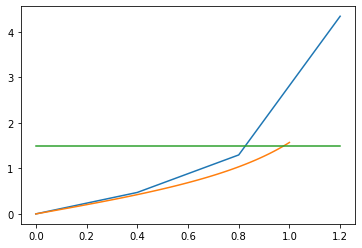

In [51]:
lam_0 = 0
theta_0 = 0
thetas = [theta_0]
lams = [lam_0]

theta = theta_0
lam = lam_0
for i in range(3):
    theta += 0.4
    lam = lam + dr(theta, lam)*0.4
    thetas.append(theta)
    lams.append(lam)
    #print("residual:", r(theta, lam))
    
plt.plot(thetas, lams)


thetas = [theta_0]
lams = [lam_0]

theta = theta_0
lam = lam_0
for i in range(100):
    theta += 0.01
    lam = lam + dr(theta, lam)*0.01
    thetas.append(theta)
    lams.append(lam)
    #print("residual:", r(theta, lam))
    
plt.plot(thetas, lams)


plt.plot([0, 1.2], [1.5, 1.5])

    

print("Svar er ca 0.85")
print("Ved å se på grafen kan det estimeres til 0.83", r(0.98, 1.5))
print("Ved høyere presisjon blir svaret ca 0.98", r(0.98, 1.5))